In [1]:
#James Godkin

In [98]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

In [3]:
blueRed_df = pd.read_csv('BlueOrRed.csv')
blueRed_df.head(5)

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,51,1,1,1,4,171.0,15,0,1
1,46,1,1,1,6,420.0,15,1,0
2,55,1,0,1,6,132.0,16,0,1
3,50,1,0,1,4,18.0,8,0,0
4,49,1,1,1,2,66.0,15,1,1


In [4]:
blueRed_df.info()
blueRed_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10000 non-null  int64  
 1   HomeOwner      10000 non-null  int64  
 2   Female         10000 non-null  int64  
 3   Married        10000 non-null  int64  
 4   HouseholdSize  10000 non-null  int64  
 5   Income         10000 non-null  float64
 6   Education      10000 non-null  int64  
 7   Church         10000 non-null  int64  
 8   Undecided      10000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 703.2 KB


Age              0
HomeOwner        0
Female           0
Married          0
HouseholdSize    0
Income           0
Education        0
Church           0
Undecided        0
dtype: int64

In [5]:
mmScaler = MinMaxScaler()
mmBlueRed_df = blueRed_df
mmBlueRed_df[['Age', 'HouseholdSize', 'Income', 'Education']] = \
    mmScaler.fit_transform(blueRed_df[['Age', 'HouseholdSize', 'Income', 'Education']])
mmBlueRed_df.head(5)

,Age,HomeOwner,Female,Married,HouseholdSize,Income,Education,Church,Undecided
0,0.523810,1,1,1,0.500000,0.306422,0.583333,0,1
1,0.444444,1,1,1,0.833333,0.763303,0.583333,1,0
2,0.587302,1,0,1,0.833333,0.234862,0.666667,0,1
3,0.507937,1,0,1,0.500000,0.025688,0.000000,0,0
4,0.492063,1,1,1,0.166667,0.113761,0.583333,1,1


In [6]:
undecided_df = mmBlueRed_df['Undecided']
mmBlueRed_df = mmBlueRed_df.drop(columns = 'Undecided')
X_train, X_test, y_train, y_test = train_test_split(mmBlueRed_df, undecided_df, test_size=0.3,random_state=42)
print('X_train:')
print(X_train.head(5))
print('y_train:')
print(y_train.head(5))
print('X_test:')
print(X_test.head(5))
print('y_test:')
print(y_test.head(5))

X_train:
           Age  HomeOwner  Female  Married  HouseholdSize    Income  \
9069  0.492063          1       1        1       0.666667  0.174312   
2603  0.365079          1       1        1       0.833333  0.187156   
7738  0.523810          1       0        0       0.333333  0.144954   
1579  0.301587          1       1        1       0.333333  0.029358   
5058  0.682540          1       1        1       0.333333  0.236697   

      Education  Church  
9069   0.333333       0  
2603   0.083333       1  
7738   0.833333       0  
1579   0.083333       1  
5058   0.666667       1  
y_train:
9069    0
2603    0
7738    0
1579    0
5058    1
Name: Undecided, dtype: int64
X_test:
           Age  HomeOwner  Female  Married  HouseholdSize    Income  \
6252  0.238095          1       1        1       0.833333  0.104587   
4684  0.396825          1       0        1       0.333333  0.269725   
1731  0.412698          1       1        1       0.333333  0.066055   
4742  0.444444          1  

In [7]:
blueRed_dtclf = tree.DecisionTreeClassifier()
blueRed_dtclf.fit(X_train, y_train)
y_train_pred = blueRed_dtclf.predict(X_train)
y_test_pred = blueRed_dtclf.predict(X_test)
print('y_train_pred:')
print(y_train_pred[0:100])
print('y_test_pred:')
print(y_test_pred[0:100])

y_train_pred:
[0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1]
y_test_pred:
[0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0]


In [8]:
metrics.accuracy_score(y_train,y_train_pred)

1.0

In [9]:
metrics.accuracy_score(y_test,y_test_pred)

0.9673333333333334

In [10]:
blueRed_dtclf.score(X_train, y_train)

1.0

In [11]:
blueRed_dtclf.score(X_test, y_test)

0.9673333333333334

In [12]:
metrics.zero_one_loss(y_train, y_train_pred)

0.0

In [13]:
metrics.zero_one_loss(y_test, y_test_pred)

0.03266666666666662

In [14]:
metrics.recall_score(y_train, y_train_pred)

1.0

In [15]:
metrics.recall_score(y_test, y_test_pred)

0.9637436762225969

In [16]:
metrics.f1_score(y_train, y_train_pred)

1.0

In [17]:
metrics.f1_score(y_test, y_test_pred)

0.9588926174496644

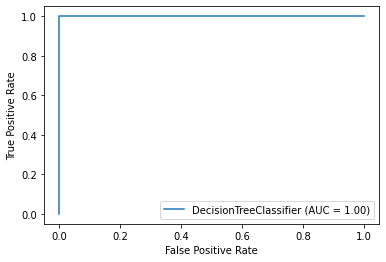

In [18]:
metrics.plot_roc_curve(blueRed_dtclf, X_train, y_train)

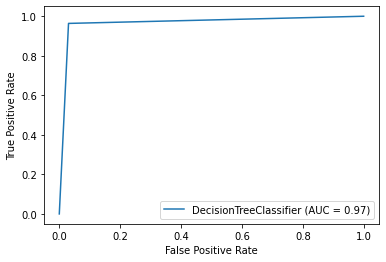

In [19]:
metrics.plot_roc_curve(blueRed_dtclf, X_test, y_test)

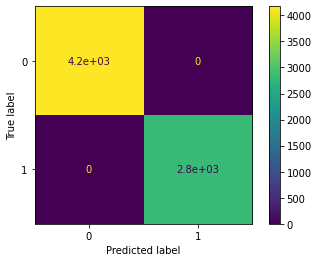

In [20]:
metrics.plot_confusion_matrix(blueRed_dtclf, X_train, y_train)

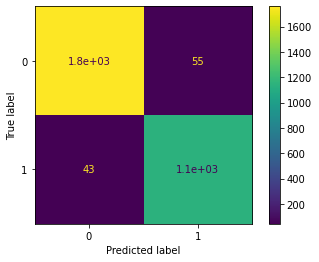

In [21]:
metrics.plot_confusion_matrix(blueRed_dtclf, X_test, y_test)

In [22]:
blueRed_dtclf.tree_.max_depth

18

In [23]:
depth = []
errorRate = []
for i in range(1, blueRed_dtclf.tree_.max_depth):
    depthBlueRed_dtclf = tree.DecisionTreeClassifier(max_depth=i)
    depthBlueRed_dtclf.fit(X_train, y_train)
    y_train_pred_depth = depthBlueRed_dtclf.predict(X_train)
    errorRate.append(metrics.zero_one_loss(y_train, y_train_pred_depth))
    depth.append(i)
print(depth)
print(errorRate)
print(np.argmin(errorRate))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.30614285714285716, 0.20114285714285718, 0.0814285714285714, 0.029571428571428582, 0.019857142857142907, 0.014857142857142902, 0.013714285714285679, 0.012428571428571455, 0.010285714285714231, 0.008571428571428563, 0.0071428571428571175, 0.005428571428571449, 0.004142857142857115, 0.002714285714285669, 0.0011428571428571122, 0.0004285714285714448, 0.00014285714285711126]
16


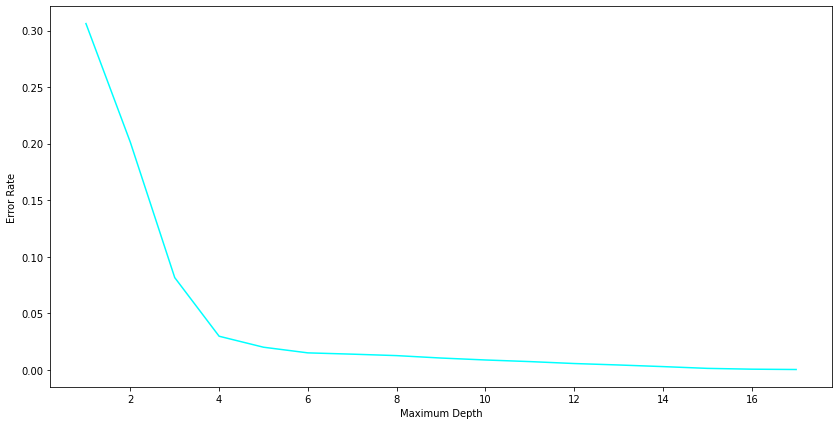

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(depth, errorRate, c="cyan");
plt.xlabel("Maximum Depth");
plt.ylabel("Error Rate");
plt.show()

In [25]:
param_grid = [{"max_depth":range(1, blueRed_dtclf.tree_.max_depth), 'max_features':[0.2, 0.4, 0.6, 0.8]}]


blueRed_dtclf_grid_search = GridSearchCV(blueRed_dtclf, param_grid, cv=8,
                           return_train_score=True)

blueRed_dtclf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': range(1, 18),
                         

In [26]:
print(blueRed_dtclf_grid_search.best_estimator_)
print(blueRed_dtclf_grid_search.best_params_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'max_depth': 6, 'max_features': 0.8}


In [45]:
depth = []
score_list = []
for i in range(1, blueRed_dtclf.tree_.max_depth):
    depthBlueRed_dtclf = tree.DecisionTreeClassifier(max_depth=i)
    depthBlueRed_dtclf.fit(X_train, y_train)
    score = cross_val_score(estimator=blueRed_dtclf, X=X_train, y=y_train, scoring='accuracy', cv=8)
    score_list.append(np.mean(1-score))
    depth.append(i)
print(depth)
print(score_list)
print(np.argmin(score_list))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.036571428571428574, 0.037000000000000005, 0.03685714285714285, 0.0377142857142857, 0.03614285714285713, 0.036571428571428574, 0.03599999999999999, 0.03857142857142856, 0.03728571428571427, 0.03685714285714285, 0.03671428571428573, 0.035714285714285726, 0.03557142857142859, 0.037428571428571436, 0.036571428571428574, 0.03614285714285716, 0.03671428571428571]
12


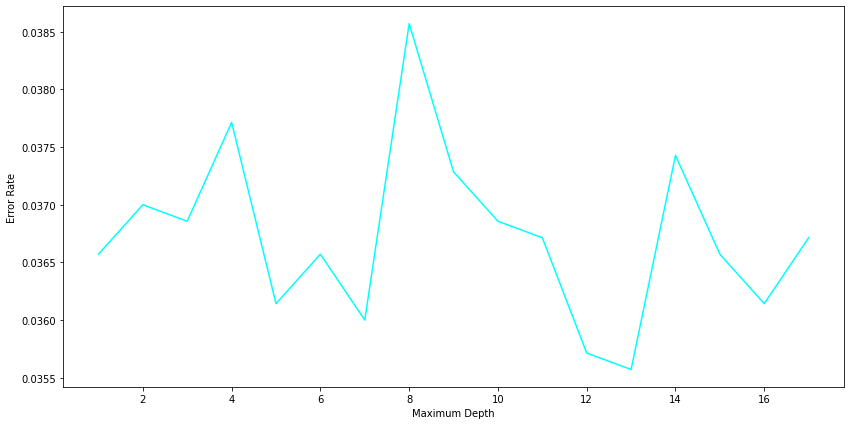

In [46]:
plt.figure(figsize=(14, 7))
plt.plot(depth, score_list, c="cyan");
plt.xlabel("Maximum Depth");
plt.ylabel("Error Rate");
plt.show()

In [65]:
train_acc, test_acc = validation_curve(blueRed_dtclf, X_train, y_train, param_name="max_depth", param_range=range(1, blueRed_dtclf.tree_.max_depth), cv=8)
train_acc_ave = np.mean(train_acc, axis=1)
test_acc_ave =np.mean(test_acc, axis=1)

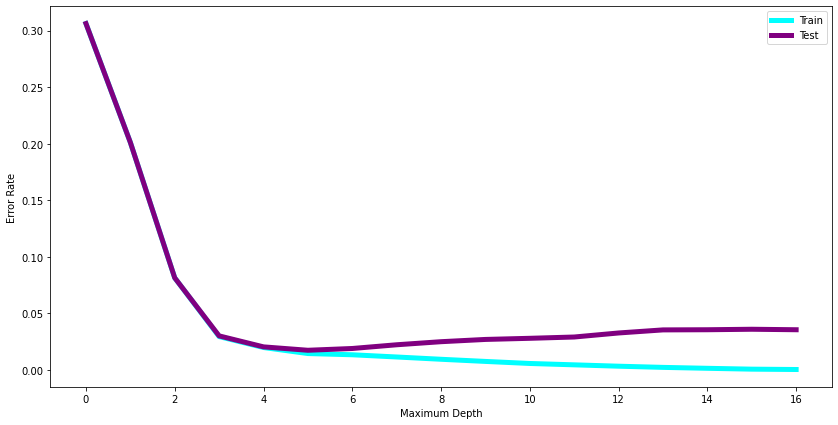

In [66]:
plt.figure(figsize=(14, 7))
plt.xlabel("Maximum Depth")
plt.ylabel("Error Rate")
plt.plot(1-train_acc_ave, color="cyan", lw=5)
plt.plot(1-test_acc_ave, color="purple", lw=5)
plt.legend(["Train", "Test"])
plt.show()

In [72]:
print(np.argmin(1-train_acc_ave))
print(np.argmin(1-test_acc_ave))

16
5


In [ ]:
#Are decision trees and random forest good models for predicting ESRB ratings for video games?

In [166]:
esrb_df = pd.read_csv('video_games_esrb_rating.csv')
esrb_df.head(5)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [167]:
esrb_df.info()
esrb_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [168]:
esrb_df=pd.get_dummies(esrb_df, columns=['esrb_rating'])
esrb_df=esrb_df.drop(columns = ['title', 'console', 'no_descriptors'])
esrb_df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1891,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1893,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [169]:
esrbRatings_df = esrb_df[['esrb_rating_E', 'esrb_rating_ET', 'esrb_rating_M', 'esrb_rating_T']]
esrb_df = esrb_df.drop(columns = ['esrb_rating_E', 'esrb_rating_ET', 'esrb_rating_M', 'esrb_rating_T'])
X_train, X_test, y_train, y_test = train_test_split(esrb_df, esrbRatings_df, test_size=0.3,random_state=52637)
print('X_train:')
print(X_train.head(5))
print('y_train:')
print(y_train.head(5))
print('X_test:')
print(X_test.head(5))
print('y_test:')
print(y_test.head(5))

X_train:
      alcohol_reference  animated_blood  blood  blood_and_gore  \
1430                  0               0      1               0   
1093                  0               0      0               0   
219                   0               0      0               0   
577                   0               0      0               0   
1367                  0               0      0               0   

      cartoon_violence  crude_humor  drug_reference  fantasy_violence  \
1430                 0            0               0                 0   
1093                 0            0               0                 0   
219                  0            0               0                 1   
577                  0            0               0                 0   
1367                 0            0               0                 0   

      intense_violence  language  ...  partial_nudity  sexual_content  \
1430                 0         0  ...               0               0   
1093     

In [170]:
esrb_dtclf = tree.DecisionTreeClassifier()
esrb_dtclf.fit(X_train, y_train)
y_train_pred_dt = esrb_dtclf.predict(X_train)
print('y_train_pred:')
print(y_train_pred[0:10])

y_train_pred:
[[0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]]


In [172]:
print(metrics.accuracy_score(y_train,y_train_pred_dt))
print(metrics.zero_one_loss(y_train, y_train_pred_dt))
print(metrics.classification_report(y_train, y_train_pred_dt))

0.9072398190045249
0.09276018099547512
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       290
           1       0.89      0.87      0.88       287
           2       0.94      0.92      0.93       271
           3       0.91      0.88      0.90       478

   micro avg       0.93      0.91      0.92      1326
   macro avg       0.93      0.91      0.92      1326
weighted avg       0.93      0.91      0.92      1326
 samples avg       0.91      0.91      0.91      1326



In [195]:
esrb_rfclf = RandomForestClassifier(n_estimators=500, random_state=52637)
esrb_rfclf.fit(X_train, y_train)
y_train_pred_rf = esrb_dtclf.predict(X_train)
print('y_train_pred:')
print(y_train_pred[0:10])

y_train_pred:
[[0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]]


In [197]:
print(metrics.accuracy_score(y_train,y_train_pred_rf))
print(metrics.zero_one_loss(y_train, y_train_pred_rf))
print(metrics.classification_report(y_train, y_train_pred_rf))

0.9072398190045249
0.09276018099547512
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       290
           1       0.89      0.87      0.88       287
           2       0.94      0.92      0.93       271
           3       0.91      0.88      0.90       478

   micro avg       0.93      0.91      0.92      1326
   macro avg       0.93      0.91      0.92      1326
weighted avg       0.93      0.91      0.92      1326
 samples avg       0.91      0.91      0.91      1326



In [176]:
print('dt')
print(esrb_dtclf.get_params())
print('rf')
print(esrb_rfclf.get_params())

dt
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
rf
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 52637, 'verbose': 0, 'warm_start': False}


In [188]:
param_grid = [{'max_features':range(1, len(esrb_df.columns))}]
esrb_dtclf_grid_search = GridSearchCV(esrb_dtclf, param_grid, cv=8,
                           return_train_score=True)

esrb_dtclf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': range(1, 30)}],
             pre_dis

In [189]:
print(esrb_dtclf_grid_search.best_estimator_)
print(esrb_dtclf_grid_search.best_params_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
{'max_features': 15}


In [190]:
best_y_train_pred_dt = esrb_dtclf_grid_search.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train,best_y_train_pred_dt))
print(metrics.zero_one_loss(y_train, best_y_train_pred_dt))
print(metrics.classification_report(y_train, best_y_train_pred_dt))

0.9072398190045249
0.09276018099547512
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       290
           1       0.89      0.87      0.88       287
           2       0.94      0.92      0.93       271
           3       0.91      0.88      0.90       478

   micro avg       0.93      0.91      0.92      1326
   macro avg       0.93      0.91      0.92      1326
weighted avg       0.93      0.91      0.92      1326
 samples avg       0.91      0.91      0.91      1326



C:\Users\gilat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
param_grid = [{'max_features':range(1, len(esrb_df.columns))}]
esrb_rfclf_grid_search = GridSearchCV(esrb_rfclf, param_grid, cv=8,
                           return_train_score=True, n_jobs=-1)

esrb_rfclf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False,
                                              rando

In [199]:
print(esrb_rfclf_grid_search.best_estimator_)
print(esrb_rfclf_grid_search.best_params_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=52637,
                       verbose=0, warm_start=False)
{'max_features': 5}


In [200]:
best_y_train_pred_rf = esrb_rfclf_grid_search.best_estimator_.predict(X_train)
print(metrics.accuracy_score(y_train,best_y_train_pred_rf))
print(metrics.zero_one_loss(y_train, best_y_train_pred_rf))
print(metrics.classification_report(y_train, best_y_train_pred_rf))

0.9155354449472096
0.08446455505279038
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       290
           1       0.89      0.87      0.88       287
           2       0.94      0.92      0.93       271
           3       0.90      0.90      0.90       478

   micro avg       0.92      0.92      0.92      1326
   macro avg       0.92      0.92      0.92      1326
weighted avg       0.92      0.92      0.92      1326
 samples avg       0.92      0.92      0.92      1326



C:\Users\gilat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
feature_list =[]
feature_importances = esrb_rfclf_grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns.values
for i in range(len(feature_importances)):
    feature_list.append([feature_names[i], feature_importances[i]])
feature_df_rf = pd.DataFrame(feature_list, columns = ['Feature', 'Importances'])
feature_df_rf.sort_values(by=['Importances'],ascending=False)

,Feature,Importances
24,strong_janguage,0.133804
7,fantasy_violence,0.120852
2,blood,0.111862
3,blood_and_gore,0.087532
29,violence,0.046871
26,suggestive_themes,0.045074
9,language,0.043274
8,intense_violence,0.035745
18,mild_violence,0.031833
23,simulated_gambling,0.029654


In [211]:
feature_list =[]
feature_importances = esrb_dtclf_grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns.values
for i in range(len(feature_importances)):
    feature_list.append([feature_names[i], feature_importances[i]])
feature_df = pd.DataFrame(feature_list, columns = ['DT_Feature', 'DT_Importances'])
feature_df.sort_values(by=['DT_Importances'],ascending=False)
feature_df[['RF_Feature', 'RF_Importances']]=feature_df_rf[['Feature', 'Importances']]
feature_df

,DT_Feature,DT_Importances,RF_Feature,RF_Importances
0,alcohol_reference,0.017660,alcohol_reference,0.021200
1,animated_blood,0.012415,animated_blood,0.011752
2,blood,0.102803,blood,0.111862
3,blood_and_gore,0.088887,blood_and_gore,0.087532
4,cartoon_violence,0.036606,cartoon_violence,0.027227
5,crude_humor,0.040013,crude_humor,0.026839
6,drug_reference,0.014470,drug_reference,0.012938
7,fantasy_violence,0.120897,fantasy_violence,0.120852
8,intense_violence,0.039288,intense_violence,0.035745
9,language,0.042009,language,0.043274


In [206]:
print('Random Forest')
y_test_pred_rf = esrb_rfclf_grid_search.best_estimator_.predict(X_test)
print('Accuracy Score')
print(metrics.accuracy_score(y_test,y_test_pred_rf))
print(metrics.zero_one_loss(y_test, y_test_pred_rf))
print(metrics.classification_report(y_test, y_test_pred_rf))
print('Decision Tree ')
y_test_pred_dt = esrb_dtclf_grid_search.best_estimator_.predict(X_test)
print('Accuracy Score')
print(metrics.accuracy_score(y_test,y_test_pred_dt))
print(metrics.zero_one_loss(y_test, y_test_pred_dt))
print(metrics.classification_report(y_test, y_test_pred_dt))

Random Forest
Accuracy Score
0.8541300527240774
0.14586994727592262
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       126
           1       0.78      0.75      0.76       116
           2       0.91      0.92      0.92       116
           3       0.85      0.81      0.83       211

   micro avg       0.88      0.85      0.86       569
   macro avg       0.88      0.86      0.87       569
weighted avg       0.87      0.85      0.86       569
 samples avg       0.85      0.85      0.85       569

Decision Tree 
Accuracy Score
0.8418277680140598
0.15817223198594021
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       126
           1       0.77      0.75      0.76       116
           2       0.88      0.91      0.90       116
           3       0.85      0.78      0.81       211

   micro avg       0.87      0.84      0.86       569
   macro avg       0.87      0.85      0.86     

C:\Users\gilat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gilat\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
